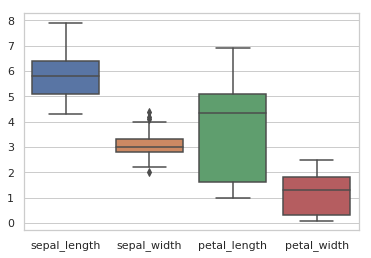

In [1]:
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
iris = sns.load_dataset("iris")
sns.boxplot(data=iris);

In [25]:
import pandas
from datetime import datetime
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

In [3]:
ifile="data2.dat"
df=pd.read_csv(ifile,header=0)

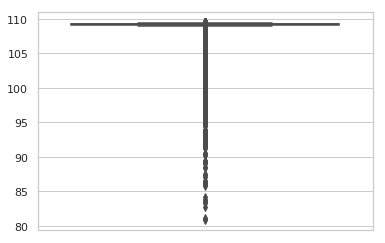

In [4]:
sns.boxplot(y=df)

In [5]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)
threshold = 3
res=np.where(z > 3)

[[ 0.16440214]
 [ 0.14124389]
 [ 0.14703346]
 ..., 
 [ 4.8358497 ]
 [ 0.2971761 ]
 [ 0.29910595]]


In [6]:
len(res[0])

288

In [7]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [8]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

NameError: name 'outlier_fraction' is not defined

In [ ]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))
outliers_iqr(df)

In [ ]:
len(df)

In [9]:
df.shape

(9999, 1)

In [10]:
df_o = df[(z < 3).all(axis=1)]

In [11]:
df_o.shape

(9711, 1)

In [19]:
df_o.to_csv('data2-o.dat',index=False)

In [20]:
from datetime import datetime
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

ImportError: No module named data

In [27]:
def hurst(ts):

    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    # Here it calculates the variances, but why it uses 
    # standard deviation and then make a root of it?
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0


# Download the stock prices series from Yahoo
aapl = df

# Call the function
hurst(aapl)


array([ 0.00051442])